In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
path = './_data.csv'
df = pd.read_csv(path)
# df.columns.to_list()

In [4]:
# СЛУЖЕБНЫЙ

# df.isnull().any()
# df.iloc[:, 15:25].head(5)
# df.loc[13185:13234,'Лифт'].to_list()

<Информация о проекте>\n
<Информация о команде>\n
<Информация о гипотезах>\n
<Информация об используемых подходах к работе с данными с учётом ограничений по ресурсам>\n ДОПОЛНИТЬ

In [5]:
print(f'Общее количество строк в датасете: {df.shape[0]}, количество колонок: {df.shape[1]}.')
print('Наименование колонок:')
for i in range(df.shape[1]):
    print(f'- {df.columns[i]}')

Общее количество строк в датасете: 23368, количество колонок: 25.
Наименование колонок:
- Unnamed: 0
- ID  объявления
- Количество комнат
- Тип
- Метро
- Адрес
- Площадь, м2
- Дом
- Парковка
- Цена
- Телефоны
- Описание
- Ремонт
- Площадь комнат, м2
- Балкон
- Окна
- Санузел
- Можно с детьми/животными
- Дополнительно
- Название ЖК
- Серия дома
- Высота потолков, м
- Лифт
- Мусоропровод
- Ссылка на объявление


Учитывая, что пилотным регионом является Москва, из датасета были исключены строки с объектами недвижимости, расположенными не в Москве.

In [6]:
df = df[df["Адрес"].str.contains("Москва")]
df

print(f'Количество строк, оставшихся после исключения объектов, расположенных не в Москве: {df.shape[0]}')

Количество строк, оставшихся после исключения объектов, расположенных не в Москве: 19737


Были исследованы данные по каждой колонке, сделаны предварительные выводы о целесообразности либо нецелесообразности включения тех или иных колонок в итоговый датасет, о необходимости преобразования данных, о возможных стратегиях решения проблемы отсутствия значений. 
Результаты предварительного анализа по каждой колонке представлены ниже:

**Колонка 0**

In [7]:
print(f'Название колонки: {df.columns[0]}')
print('Колонка представляет собой последовательный возрастающий ряд целых чисел, начиная от "0", дублирующий индекс первоначального датасета.')
print(f'Уникальны ли значения в колонке:  {"да" if len(set(df.iloc[:,0])) == len(df.iloc[:,0]) else "нет"}.')
print(f'Содержит ли колонка отсутствующие значения: {"да. Количество отсутствующих значений: " + str(df.iloc[:,0].isnull().sum()) + ". Доля отсутствующих значений в датасете: " + str(round(df.iloc[:,0].isnull().sum() / len(df.iloc[:,0]), 4) * 100) + "%" if df.iloc[:,0].isnull().any() else "нет"}.')
print(f'Тип данных в колонке: {df.dtypes[0]}')
print('Колонка подлежит исключению, так как не содержит ценных данных для последующей работы.')

Название колонки: Unnamed: 0
Колонка представляет собой последовательный возрастающий ряд целых чисел, начиная от "0", дублирующий индекс первоначального датасета.
Уникальны ли значения в колонке:  да.
Содержит ли колонка отсутствующие значения: нет.
Тип данных в колонке: int64
Колонка подлежит исключению, так как не содержит ценных данных для последующей работы.


**Колонка 1**

In [8]:
print(f'Название колонки: {df.columns[1]}')
print('Колонка содержит перечень идентификационных номеров предложений.')
print(f'Уникальны ли значения в колонке:  {"да" if len(set(df.iloc[:,1])) == len(df.iloc[:,1]) else "нет"}')
print(f'Содержит ли колонка отсутствующие значения: {"да. Количество отсутствующих значений: " + str(df.iloc[:,1].isnull().sum()) + ". Доля отсутствующих значений в датасете: " + str(round(df.iloc[:,1].isnull().sum() / len(df.iloc[:,1]), 4) * 100) + "%" if df.iloc[:,1].isnull().any() else "нет"}')
print(f'Тип данных в колонке: {df.dtypes[1]}')
print('Колонка подлежит исключению, так как не содержит ценных данных для последующей работы.')

Название колонки: ID  объявления
Колонка содержит перечень идентификационных номеров предложений.
Уникальны ли значения в колонке:  да
Содержит ли колонка отсутствующие значения: нет
Тип данных в колонке: int64
Колонка подлежит исключению, так как не содержит ценных данных для последующей работы.


**Колонка 2**

Название колонки: Количество комнат
Колонка содержит значение количества комнат в сдаваемом в аренду объекте недвижимости.
Уникальны ли значения в колонке:  нет.
Содержит ли колонка отсутствующие значения: да. Количество отсутствующих значений: 535. Доля отсутствующих значений в датасете: 2.71%.
Тип данных в колонке: object
Минимальное количество комнат в объекте недвижимости: 1, максимальное количество комнат в объекте недвижимости: 6


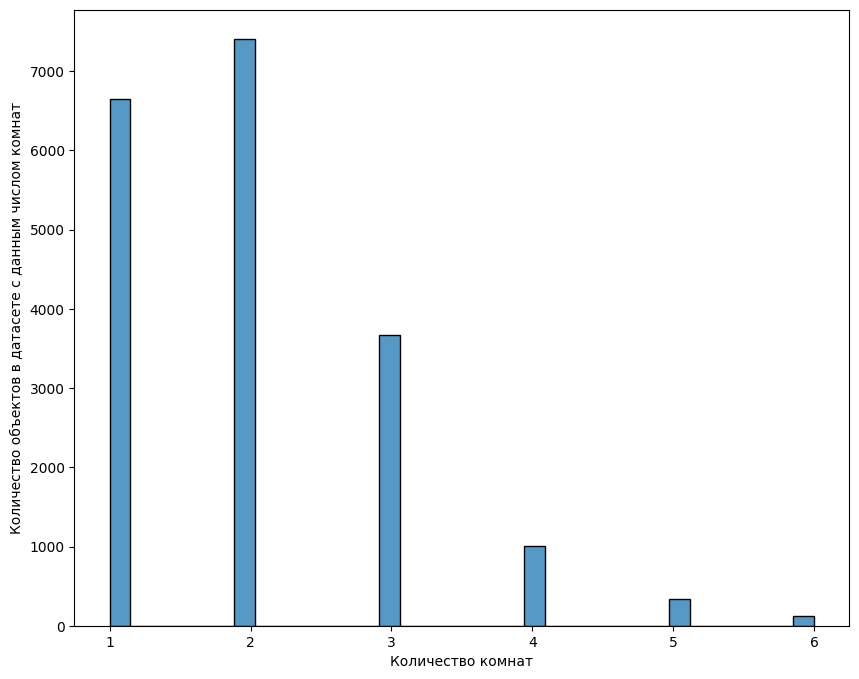

Колонка подлежит использованию в финальном датасете, с переводом значений в формат int.


In [9]:
print(f'Название колонки: {df.columns[2]}')
print('Колонка содержит значение количества комнат в сдаваемом в аренду объекте недвижимости.')
print(f'Уникальны ли значения в колонке:  {"да" if len(set(df.iloc[:,2])) == len(df.iloc[:,2]) else "нет"}.')
print(f'Содержит ли колонка отсутствующие значения: {"да. Количество отсутствующих значений: " + str(df.iloc[:,2].isnull().sum()) + ". Доля отсутствующих значений в датасете: " + str(round(df.iloc[:,2].isnull().sum() / len(df.iloc[:,2]), 4) * 100) + "%" if df.iloc[:,2].isnull().any() else "нет"}.')
print(f'Тип данных в колонке: {df.dtypes[2]}')
df['rooms'] = df.iloc[:,2].apply(lambda x: int(x.split(',')[0]) if pd.notnull(x) else x)
rooms = df['rooms'].unique().tolist()
rooms = [int(x) for x in rooms if pd.notnull(x)]
print(f'Минимальное количество комнат в объекте недвижимости: {min(rooms)}, максимальное количество комнат в объекте недвижимости: {max(rooms)}')
plt.figure(figsize=(10,8))
sns.histplot(data=df, x='rooms')
plt.xlabel('Количество комнат')
plt.ylabel('Количество объектов в датасете с данным числом комнат')
plt.show();
# ПЛОТ ОБЩАЯ ПЛОЩАДЬ / КОМНАТЫ
print('Колонка подлежит использованию в финальном датасете, с переводом значений в формат int.')

**Колонка 3**

In [10]:
print(f'Название колонки: {df.columns[3]}')
print('Колонка содержит указание типа сдаваемого в аренду объекта недвижимости.')
print(f'Уникальны ли значения в колонке:  {"да" if len(set(df.iloc[:,3])) == len(df.iloc[:,3]) else "нет"}')
print(f'Перечень уникальных значений: {df.iloc[:,3].unique()}, т.е. все значения в колонке идентичны друг другу.')
print(f'Содержит ли колонка отсутствующие значения: {"да. Количество отсутствующих значений: " + str(df.iloc[:,3].isnull().sum()) + ". Доля отсутствующих значений в датасете: " + str(round(df.iloc[:,3].isnull().sum() / len(df.iloc[:,3]), 4) * 100) + "%" if df.iloc[:,3].isnull().any() else "нет"}')
print(f'Тип данных в колонке: {df.dtypes[3]}')
print('Колонка подлежит исключению ввиду неинформативности (имеется единственное уникальное значение).')

Название колонки: Тип
Колонка содержит указание типа сдаваемого в аренду объекта недвижимости.
Уникальны ли значения в колонке:  нет
Перечень уникальных значений: ['Квартира'], т.е. все значения в колонке идентичны друг другу.
Содержит ли колонка отсутствующие значения: нет
Тип данных в колонке: object
Колонка подлежит исключению ввиду неинформативности (имеется единственное уникальное значение).


**Колонка 4**

In [12]:
print(f'Название колонки: {df.columns[4]}')
print('Колонка содержит информацию о станции метро, вблизи которой находится объект недвижимости, а также о времени, затрачиваемом на перемещение до станции метро.')
print(f'Уникальны ли значения в колонке:  {"да" if len(set(df.iloc[:,4])) == len(df.iloc[:,4]) else "нет"}')
print(len(set(df.iloc[:,4])))
print(f'Содержит ли колонка отсутствующие значения: {"да. Количество отсутствующих значений: " + str(df.iloc[:,4].isnull().sum()) + ". Доля отсутствующих значений в датасете: " + str(round(df.iloc[:,4].isnull().sum() / len(df.iloc[:,4]), 4) * 100) + "%" if df.iloc[:,4].isnull().any() else "нет"}')
print(f'Тип данных в колонке: {df.dtypes[4]}')
# ПЛОТ ЦЕНА / МИНУТ ХОДЬБЫ ДО МЕТРО. СГРУППИРОВАТЬ??????
print(f'В финальный датасет будет включена информация либо из колонки Адрес, либо из колонки {df.columns[4]} (в части названия станций метро).')
print(f'В случае сохранения информации о названиях станций метро, строки с отсутствующими значениями (ввиду их малочисленности) будут исключены из датасета.')
print(f'Подлежит уточнению и дополнительной оценке целесообразность включения в финальный датасет информации о времени перемещения до станции метро.')


Название колонки: Метро
Колонка содержит информацию о станции метро, вблизи которой находится объект недвижимости, а также о времени, затрачиваемом на перемещение до станции метро.
Уникальны ли значения в колонке:  нет
4872
Содержит ли колонка отсутствующие значения: да. Количество отсутствующих значений: 346. Доля отсутствующих значений в датасете: 1.7500000000000002%
Тип данных в колонке: object
В финальный датасет будет включена информация либо из колонки Адрес, либо из колонки Метро (в части названия станций метро).
В случае сохранения информации о названиях станций метро, строки с отсутствующими значениями (ввиду их малочисленности) будут исключены из датасета
Подлежит уточнению и дополнительной оценке целесообразность включения в финальный датасет информации о времени перемещения до станции метро.


Колонка 5

In [13]:
print(f'Название колонки: {df.columns[5]}')
print('Колонка содержит информацию об адресе объекта.')
print(f'Уникальны ли значения в колонке:  {"да" if len(set(df.iloc[:,5])) == len(df.iloc[:,5]) else "нет"}')
print(f'Содержит ли колонка отсутствующие значения: {"да. Количество отсутствующих значений: " + str(df.iloc[:,5].isnull().sum()) + ". Доля отсутствующих значений в датасете: " + str(round(df.iloc[:,5].isnull().sum() / len(df.iloc[:,5]), 4) * 100) + "%" if df.iloc[:,5].isnull().any() else "нет"}')
print(f'Тип данных в колонке: {df.dtypes[5]}')
print(f'В финальный датасет будет включена информация либо из колонки Метро, либо из колонки {df.columns[5]}.')

Название колонки: Адрес
Колонка содержит информацию об адресе объекта.
Уникальны ли значения в колонке:  нет
Содержит ли колонка отсутствующие значения: нет
Тип данных в колонке: object
В финальный датасет будет включена информация либо из колонки Метро, либо из колонки Адрес.


Колонка 6

In [15]:
print(f'Название колонки: {df.columns[6]}')
print('Колонка содержит информацию о площади объекта недвижимости.')
print(f'Уникальны ли значения в колонке:  {"да" if len(set(df.iloc[:,6])) == len(df.iloc[:,6]) else "нет"}')
print(f'Содержит ли колонка отсутствующие значения: {"да. Количество отсутствующих значений: " + str(df.iloc[:,6].isnull().sum()) + ". Доля отсутствующих значений в датасете: " + str(round(df.iloc[:,6].isnull().sum() / len(df.iloc[:,6]), 4) * 100) + "%" if df.iloc[:,6].isnull().any() else "нет"}')
print(f'Тип данных в колонке: {df.dtypes[6]}')
# ПЛОТ???? ЦЕНА / ПЛОЩАДЬ ВАЛИДНЫ ТОЛЬКО С УЧЁТОМ АДРЕСА, САМОСТОЯТЕЛЬНО ЭТОТ ГРАФИК НЕИНФОРМАТИВЕН
# ДОПОЛНИТЬ ГИСТОГРАММОЙ ПО ОБЩЕЙ ПЛОЩАДИ
print('Колонка подлежит сохранению, с переводом значений (первое значение в строке, соответствующее общей площади) в числовой формат')

Название колонки: Площадь, м2
Колонка содержит информацию о площади объекта недвижимости.
Уникальны ли значения в колонке:  нет
Содержит ли колонка отсутствующие значения: нет
Тип данных в колонке: object
Колонка подлежит сохранению, с переводом значений (первое значение в строке, соответствующее общей площади) в числовой формат


Колонка 7

In [16]:
print(f'Название колонки: {df.columns[7]}')
print('Колонка содержит информацию о площади объекта недвижимости.')
print(f'Уникальны ли значения в колонке:  {"да" if len(set(df.iloc[:,7])) == len(df.iloc[:,7]) else "нет"}')
print(len(set(df.iloc[:,7])))
print(f'Содержит ли колонка отсутствующие значения: {"да. Количество отсутствующих значений: " + str(df.iloc[:,7].isnull().sum()) + ". Доля отсутствующих значений в датасете: " + str(round(df.iloc[:,7].isnull().sum() / len(df.iloc[:,7]), 4) * 100) + "%" if df.iloc[:,7].isnull().any() else "нет"}')
print(f'Тип данных в колонке: {df.dtypes[7]}')
# ЭТАЖНОСТЬ / НЕЭТАЖНОСТЬ???? ПАРСИНГ + РАЗБИТЬ НА ТИПЫ ДОМОВ
print('Данные в колонке подлежат сохранению, с выделением типов домов, в которых находятся объекты недвижимости')

Название колонки: Дом
Колонка содержит информацию о площади объекта недвижимости.
Уникальны ли значения в колонке:  нет
2415
Содержит ли колонка отсутствующие значения: нет
Тип данных в колонке: object
Данные в колонке подлежат сохранению, с выделением типов домов, в которых находятся объекты недвижимости
